# Text Classification in Python using Sklearn and Random Forest Classifier

In [45]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,Classification,tweets
0,Class_B,Niggers are stupid and violent.
1,Class_A,Modern history classes instill a subconscious ...
2,Class_A,niggers come on this app and show how tragic t...
3,Class_A,"nobody hypes me more than boyfriend ,right aft..."
4,Class_B,"You have vandalized my heart, raped my soul, a..."


In [46]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

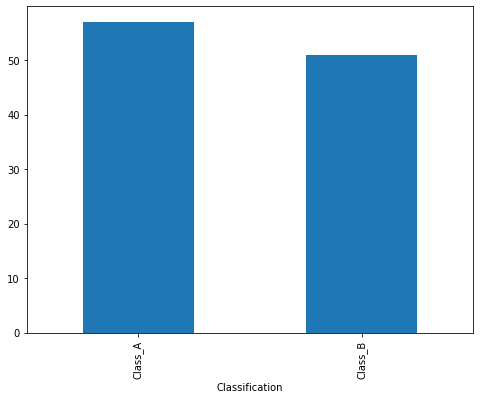

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Classification').tweets.count().plot.bar(ylim=0)
plt.show()

In [50]:
import csv
import numpy as np
trainX=[]
with open('train.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        trainX.append((row['tweets']))

In [48]:
trainY=[]
with open('train.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        for j in df['Classification']:
            if j=='Class_A':
                val=0
                trainY.append(val)
            else:
                val=1
                trainY.append(val)
del trainY[len(df):]
print(len(trainY))
print(trainY[0])

108
1


In [60]:
import pandas as pd
y_pred=[]
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(trainX)
clf = RandomForestClassifier()
clf.fit(X, trainY)
df2=pd.read_csv('test_tweets.csv')
for k in df2['tweets']:
    k=int(clf.predict(vectorizer.transform([k])))
    if k==0:
        clAss='Class_A'
        print(clAss)
        y_pred.append(clAss)
    else:
        clAss='Class_B'
        print(clAss)
        y_pred.append(clAss)

Class_B
Class_A
Class_A
Class_A
Class_B
Class_B
Class_B
Class_B
Class_A
Class_B
Class_A
Class_B
Class_B
Class_A
Class_A
Class_A
Class_A
Class_B
Class_A
Class_A
Class_B
Class_B
Class_A
Class_A
Class_A
Class_A
Class_A
Class_A
Class_A
Class_A


In [61]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print ('\nClasification report:\n', classification_report(df2['TRUE'],y_pred))
print ('\nConfussion matrix:\n',confusion_matrix(df2['TRUE'],y_pred))


Clasification report:
               precision    recall  f1-score   support

     Class_A       0.95      1.00      0.97        18
     Class_B       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Confussion matrix:
 [[18  0]
 [ 1 11]]
